In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

Reading CSV

In [3]:
clean_lines = []
with open("zomato.csv", "r", encoding="utf-8") as f:
    for line in f:
        if line.count('"') % 2 == 0:
            clean_lines.append(line)  # Line has balanced quotes

# Save the cleaned file
with open("zomato_clean.csv", "w", encoding="utf-8") as f:
    f.writelines(clean_lines)

# Load the cleaned file
df = pd.read_csv("zomato_clean.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
1,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
2,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/cafe-shuffle-...,"941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...",Cafe Shuffle,Yes,Yes,4.2/5,150,+91 9742166777,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari
4,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2/5,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari


In [22]:
df.shape

(113, 17)

In [23]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2/5,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2/5,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         113 non-null    object
 1   online_order                 113 non-null    object
 2   book_table                   113 non-null    object
 3   rate                         94 non-null     object
 4   votes                        113 non-null    int64 
 5   location                     113 non-null    object
 6   rest_type                    113 non-null    object
 7   cuisines                     113 non-null    object
 8   approx_cost(for two people)  113 non-null    object
 9   listed_in(type)              113 non-null    object
 10  listed_in(city)              113 non-null    object
dtypes: int64(1), object(10)
memory usage: 9.8+ KB


Dropping Duplicates

In [26]:
df.drop_duplicates(inplace = True)
df.shape

(113, 11)

Cleaning Rate Column

In [27]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.2/5', '4.0/5', '3.9/5', '3.1/5',
       '3.6/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5', 'NEW', '2.9/5', nan,
       '3.5/5', '3.4/5', '3.0/5'], dtype=object)

Removing "NEW" , "-" and "/5" from Rate Column

In [28]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    3.8
2    3.7
3    4.2
4    4.2
Name: rate, dtype: float64

Filling Null Values in Rate Column with Mean

In [32]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].isnull().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         113 non-null    object 
 1   online_order                 113 non-null    object 
 2   book_table                   113 non-null    object 
 3   rate                         113 non-null    float64
 4   votes                        113 non-null    int64  
 5   location                     113 non-null    object 
 6   rest_type                    113 non-null    object 
 7   cuisines                     113 non-null    object 
 8   approx_cost(for two people)  113 non-null    object 
 9   listed_in(type)              113 non-null    object 
 10  listed_in(city)              113 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.8+ KB


Dropping Null Values

In [34]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [35]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600,Cafes,Banashankari
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500,Cafes,Banashankari


In [36]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Vijay Nagar'], dtype=object)

In [37]:
df['listed_in(city)'].unique()

array(['Banashankari'], dtype=object)

Listed in(city) and location, both are there, lets keep only one.

In [38]:
df = df.drop(['listed_in(city)'], axis = 1)

In [39]:
df['Cost2plates'].unique()

array(['800', '300', '600', '500', '450', '400', '900', '200', '550',
       '750', '150', '100', '1,200', '700', '950', '250', '1,000', '350',
       '650'], dtype=object)

Removing , from Cost2Plates Column

In [40]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()
        

array([ 800.,  300.,  600.,  500.,  450.,  400.,  900.,  200.,  550.,
        750.,  150.,  100., 1200.,  700.,  950.,  250., 1000.,  350.,
        650.])

In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
1,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
2,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
3,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600.0,Cafes
4,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500.0,Cafes


Cleaning Rest Type Column

In [42]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   47
Cafe                          14
Casual Dining                 10
Takeaway, Delivery            10
Delivery                       7
Dessert Parlor                 7
Bakery                         4
Beverage Shop                  3
Bar                            2
Cafe, Casual Dining            2
Confectionery                  1
Beverage Shop, Quick Bites     1
Pub                            1
Mess                           1
Bakery, Dessert Parlor         1
Cafe, Quick Bites              1
Quick Bites, Beverage Shop     1
Name: count, dtype: int64

In [43]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Quick Bites                   47
Cafe                          14
Casual Dining                 10
Takeaway, Delivery            10
Delivery                       7
Dessert Parlor                 7
Bakery                         4
Beverage Shop                  3
Bar                            2
Cafe, Casual Dining            2
Confectionery                  1
Beverage Shop, Quick Bites     1
Pub                            1
Mess                           1
Bakery, Dessert Parlor         1
Cafe, Quick Bites              1
Quick Bites, Beverage Shop     1
Name: count, dtype: int64

Making Rest Types less than 1000 in frequency as others

In [44]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

rest_type
others    113
Name: count, dtype: int64

Cleaning Location Column

In [45]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
others    113
Name: count, dtype: int64

Cleaning Cuisines Column

In [46]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


cuisines
others    113
Name: count, dtype: int64

In [48]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Spice Elephant,Yes,No,4.1,787,others,others,others,800.0,Buffet
1,San Churro Cafe,Yes,No,3.8,918,others,others,others,800.0,Buffet
2,Addhuri Udupi Bhojana,No,No,3.7,88,others,others,others,300.0,Buffet
3,Cafe Shuffle,Yes,Yes,4.2,150,others,others,others,600.0,Cafes
4,The Coffee Shack,Yes,Yes,4.2,164,others,others,others,500.0,Cafes


Data is Clean, Lets jump to Visualization

Count Plot of various Locations

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

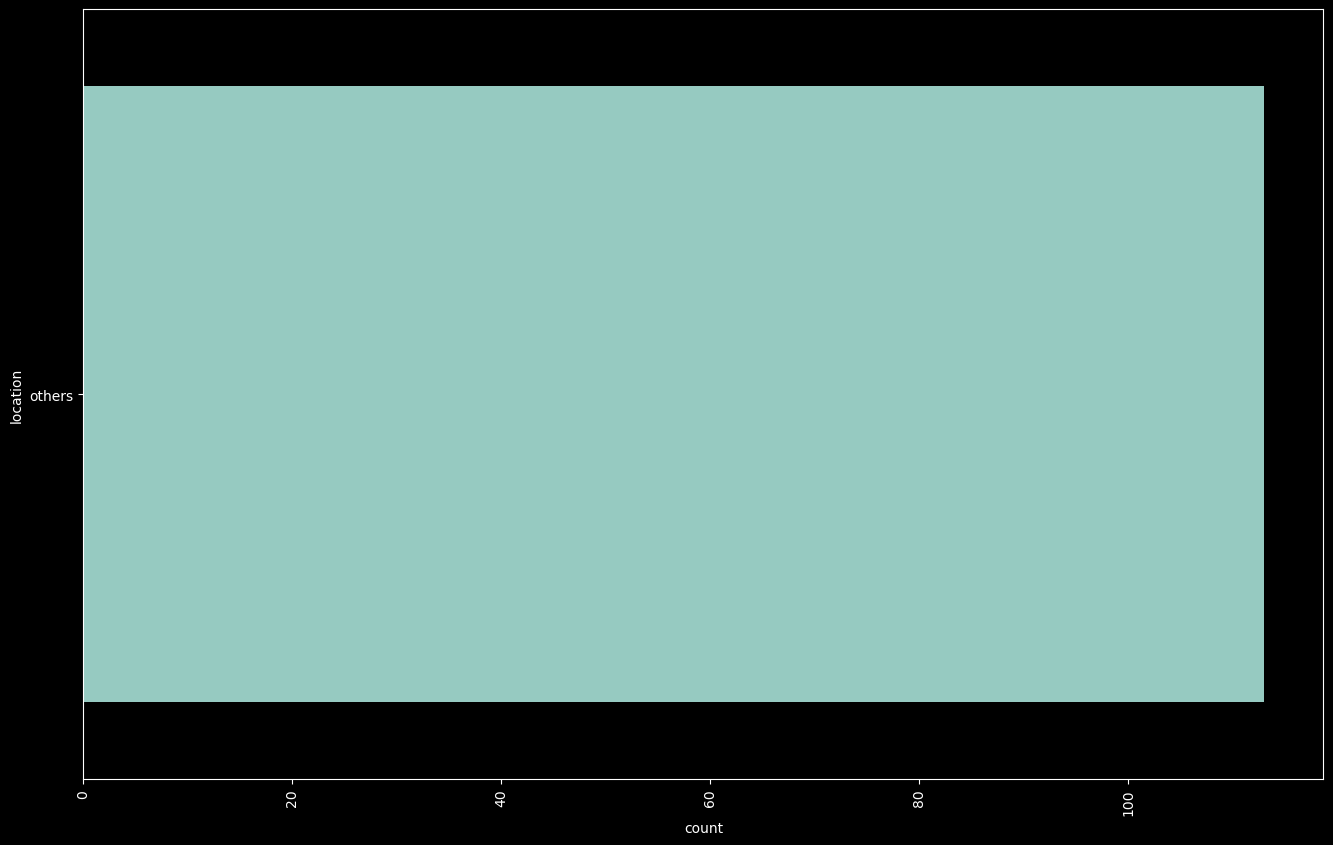

In [49]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

Visualizing Online Order

<Axes: xlabel='count', ylabel='online_order'>

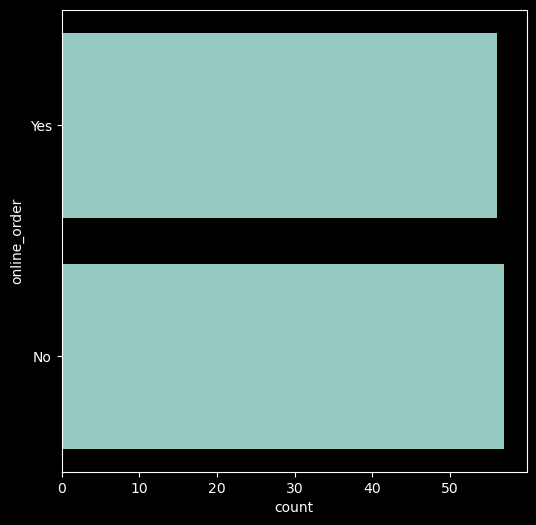

In [53]:
plt.figure(figsize=(6, 6))
sns.countplot(y='online_order', data=df)

Visualizing Book Table

C:\Users\hp\AppData\Local\Temp\ipykernel_16396\222089420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['book_table'], palette = 'rainbow')


<Axes: xlabel='count', ylabel='book_table'>

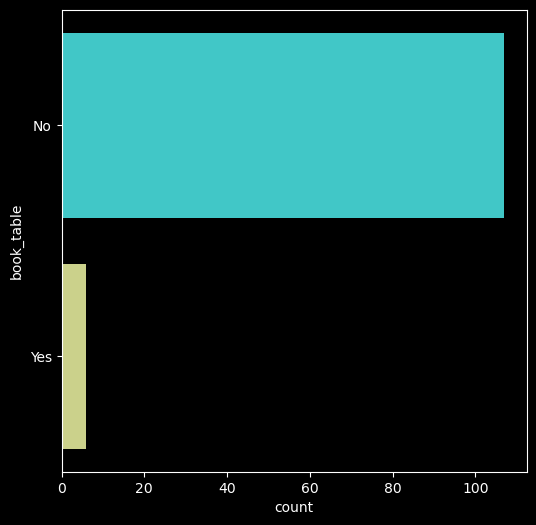

In [4]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

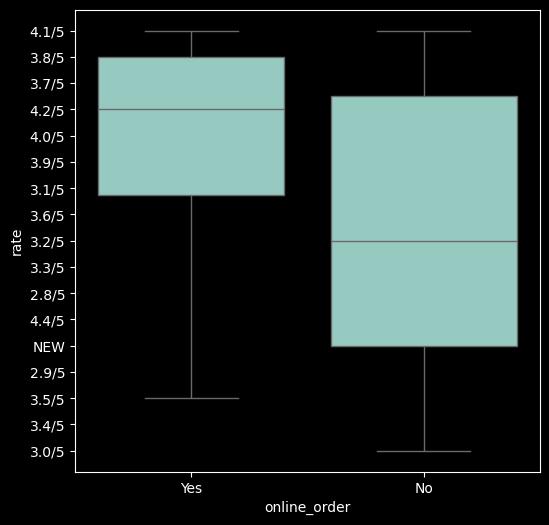

In [5]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

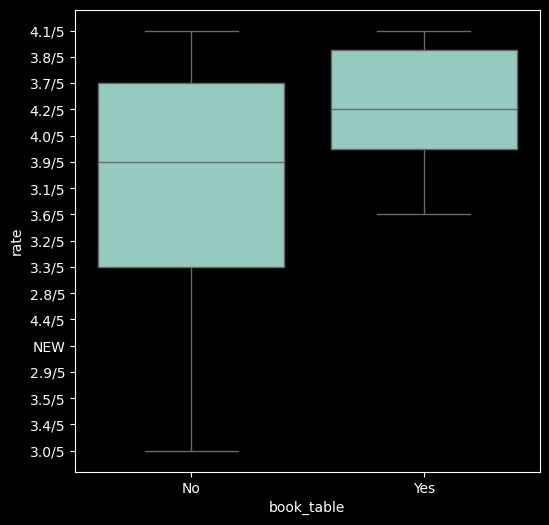

In [7]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

Visualizing Online Order Facility, Location Wise

In [8]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

C:\Users\hp\AppData\Local\Temp\ipykernel_16396\2546502282.py:4: FutureWarning: The provided callable <function sum at 0x000002C03369B9C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


name    
online_order         No Yes
location                   
Banashankari         57  31
Basavanagudi          0  12
Jayanagar             0   7
Kumaraswamy Layout    0   5
Vijay Nagar           0   1